In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
nyc_taxitrips_data = pd.read_csv("/Users/prudhvileo/Downloads/Taxidataset.csv")

In [4]:
nyc_taxitrips_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
nyc_taxitrips_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
11916662,2{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916663,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916664,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916665,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916666,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [6]:
nyc_taxitrips_data.shape

(11916667, 18)

In [7]:
#Calculating duration from the pickup and dropoff datetime in minutes

#Converting pickup and dropoff to datetime
nyc_taxitrips_data['tpep_pickup_datetime'] = pd.to_datetime(nyc_taxitrips_data['tpep_pickup_datetime'])
nyc_taxitrips_data['tpep_dropoff_datetime'] = pd.to_datetime(nyc_taxitrips_data['tpep_dropoff_datetime'])

# Duration
nyc_taxitrips_data['duration'] = nyc_taxitrips_data['tpep_dropoff_datetime'] - nyc_taxitrips_data['tpep_pickup_datetime']

#Converting time into minutes
nyc_taxitrips_data['duration'] = nyc_taxitrips_data['duration'].dt.total_seconds()/60

In [8]:
nyc_taxitrips_data.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [9]:
#Removing unwanted columns
nyc_taxitrips_data.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'extra', 'mta_tax', 'tip_amount',
                    'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'], axis=1, inplace= True)

In [10]:
nyc_taxitrips_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [11]:
nyc_taxitrips_data.shape

(11916667, 5)

In [12]:
nyc_taxitrips_data.isnull().sum() #checking missing values

passenger_count    91453
trip_distance          5
payment_type       91453
fare_amount            5
duration               5
dtype: int64

In [13]:
# Percentage of missing data to the total record of the data
print('Missing data %', round(91453/nyc_taxitrips_data.shape[0]*100, 2))

Missing data % 0.77


In [14]:
# As the missing value percent is less than 1 %, we can drop the missing values
nyc_taxitrips_data.dropna(inplace=True)

In [15]:
nyc_taxitrips_data.shape

(11825214, 5)

In [16]:
print(nyc_taxitrips_data.isnull().sum())

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64


In [17]:
nyc_taxitrips_data.dtypes

passenger_count    float64
trip_distance      float64
payment_type       float64
fare_amount        float64
duration           float64
dtype: object

In [18]:
# Change the passenger count and payment type to integer as they are present in float
nyc_taxitrips_data['passenger_count'] = nyc_taxitrips_data['passenger_count'].astype('int64')
nyc_taxitrips_data['payment_type'] = nyc_taxitrips_data['payment_type'].astype('int64')

In [19]:
# Check for duplicates in the dataset
nyc_taxitrips_data[nyc_taxitrips_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2064,1,0.00,2,7.0,0.000000
2451,1,0.00,1,52.0,0.200000
2456,2,1.70,1,9.5,13.066667
2476,1,0.40,1,4.0,3.083333
3358,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
11916654,1,2.20,1,9.5,9.316667
11916655,1,1.92,2,8.0,7.050000
11916657,1,1.27,1,7.0,7.216667
11916659,1,2.06,1,9.5,10.716667


In [20]:
# Removing duplicate rows which cannot be used in analysis
nyc_taxitrips_data.drop_duplicates(inplace=True)

In [21]:
# Number of rows left after dropping duplicates
nyc_taxitrips_data.shape

(4772511, 5)

In [22]:
nyc_taxitrips_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,1,6.0,4.800000
1,1,1.2,1,7.0,7.416667
2,1,0.6,1,6.0,6.183333
3,1,0.8,1,5.5,4.850000
4,1,0.0,2,3.5,2.300000


In [23]:
nyc_taxitrips_data['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.566941
2    0.191656
3    0.069630
5    0.066722
6    0.042873
4    0.038591
0    0.023566
7    0.000010
8    0.000006
9    0.000005
Name: proportion, dtype: float64

In [24]:
# Payment type distribution
nyc_taxitrips_data['payment_type'].value_counts()

payment_type
1    3219673
2    1477013
3      45916
4      29908
5          1
Name: count, dtype: int64

We will focus on payment types 'card' and 'online' denoted by 1 and 2 in the dataset, and exclude other types by filtering.

In addition the proportion of passenger count also clearly states there are no significant trips with more than 5 passengers, and also having 0 passengers isn't ideal. Therefore we filter to include only values from 1 to 5, excluding rest of them

In [25]:
# Filtering payment type 1 and 2
nyc_taxitrips_data = nyc_taxitrips_data[nyc_taxitrips_data['payment_type']<3]

# Filtering passenger count from 1 to 5
nyc_taxitrips_data = nyc_taxitrips_data[(nyc_taxitrips_data['passenger_count']>0)&(nyc_taxitrips_data['passenger_count']<6)]

In [26]:
# Replacing payment type encoded value 1 and 2 to card and online
nyc_taxitrips_data['payment_type'].replace([1,2],['Card','Online'],inplace=True)

In [27]:
nyc_taxitrips_data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,4.384114e+06,4.384114e+06,4.384114e+06,4.384114e+06
mean,1.770477e+00,4.919532e+00,1.903468e+01,2.643348e+01
std,1.202354e+00,5.079359e+00,1.542316e+01,9.940648e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-9.990667e+03
25%,1.000000e+00,1.640000e+00,9.500000e+00,1.083333e+01
50%,1.000000e+00,3.050000e+00,1.450000e+01,1.708333e+01
75%,2.000000e+00,6.190000e+00,2.300000e+01,2.510000e+01
max,5.000000e+00,3.699400e+02,4.265000e+03,8.525117e+03


Upon reviewing the statistics, it is clearly evident that the minimum values of trip distance, fare amount, duration are negative, which are inappropriate to perform further analysis. We need to eliminate those negative values from the dataset.

And also noticing 50 % and max values there seem to be possible outliers in the dataset, these outliers need to ensure integrity of analysis.

In [28]:
# Removing the negative values by filtering records
nyc_taxitrips_data = nyc_taxitrips_data[nyc_taxitrips_data['trip_distance']>0]
nyc_taxitrips_data = nyc_taxitrips_data[nyc_taxitrips_data['fare_amount']>0]
nyc_taxitrips_data = nyc_taxitrips_data[nyc_taxitrips_data['duration']>0]

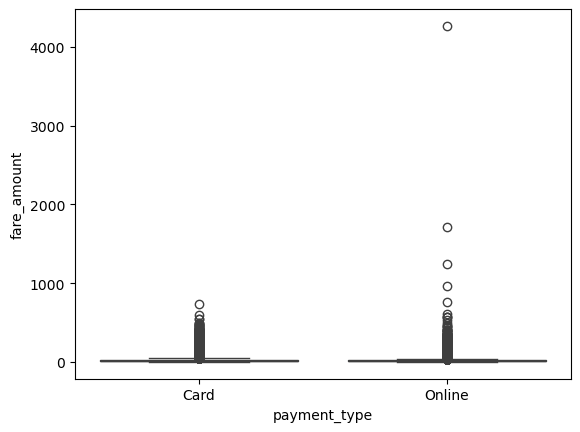

In [29]:
# Outlier visualize
sns.boxplot(data=nyc_taxitrips_data, y='fare_amount', x='payment_type')
plt.show()

In [30]:
# Removing outliers using IQR(interquartile range) for the numeric variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = nyc_taxitrips_data[col].quantile(0.25)
    Q3 = nyc_taxitrips_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5* IQR

    # filter the outliers outside the IQR range
    nyc_taxitrips_data = nyc_taxitrips_data[(nyc_taxitrips_data[col] >= lower_bound) & (nyc_taxitrips_data[col] <= upper_bound)]

We are intresting in exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount.
Distribution of payment types concerning fare amounts and trip distance.

To visualize this we'll plot histograms of distribution of passenger counts paying Card and online

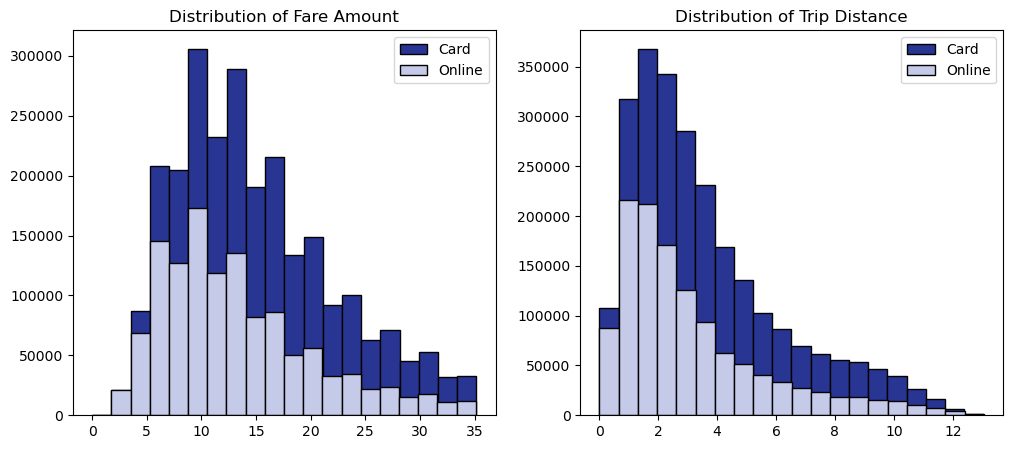

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Fare Amount")
plt.hist(nyc_taxitrips_data[nyc_taxitrips_data['payment_type'] == 'Card']['fare_amount'], histtype='barstacked',bins=20, edgecolor='k', color= '#283593',label='Card')
plt.hist(nyc_taxitrips_data[nyc_taxitrips_data['payment_type'] == 'Online']['fare_amount'], histtype='barstacked', bins=20, edgecolor= 'k', color='#C5CAE9', label='Online' )
plt.legend()


plt.subplot(1,2,2)
plt.title("Distribution of Trip Distance")
plt.hist(nyc_taxitrips_data[nyc_taxitrips_data['payment_type'] == 'Card']['trip_distance'], histtype='barstacked',bins=20, edgecolor='k', color= '#283593',label='Card')
plt.hist(nyc_taxitrips_data[nyc_taxitrips_data['payment_type'] == 'Online']['trip_distance'], histtype='barstacked', bins=20, edgecolor= 'k', color='#C5CAE9', label='Online' )
plt.legend()
plt.show()
plt.savefig('stacked_dist_taxi.png')  # Saves to current working directory

In [32]:
# Calculating the mean and standard deviation group by on payment type
nyc_taxitrips_data.groupby('payment_type').agg({'fare_amount': ['mean','std',], 'trip_distance': ['mean','std'],})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.998109  7.189713      3.635646  2.604653
Online         13.288722  6.904799      3.130914  2.513154

In order to understand the customer's preference regarding their choice of payment methods, we will need to access the distribution of payment types.

To visualise the distribution we have opted to utilize a pie chart. The graphical representation of will offer a clear, concise and intuitive understanding of the distribution between two payment methods choosen payment types.

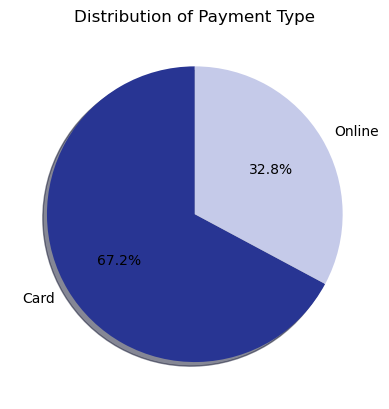

<Figure size 640x480 with 0 Axes>

In [39]:
plt.title('Distribution of Payment Type')
plt.pie(nyc_taxitrips_data['payment_type'].value_counts(normalize=True), labels=nyc_taxitrips_data['payment_type'].value_counts().index,
        startangle= 90, shadow= True, autopct= '%1.1f%%', colors=['#283593','#C5CAE9'])
plt.show()
plt.savefig('pie_dist_taxi.png')

Now we aim to conduct analysis between payment type and passenger count, the target is to see if there is any underlying connection in terms of number of passengers in the trip and the payment type they choose.

To achieve this, we use visualization chart called stacked bar chart.

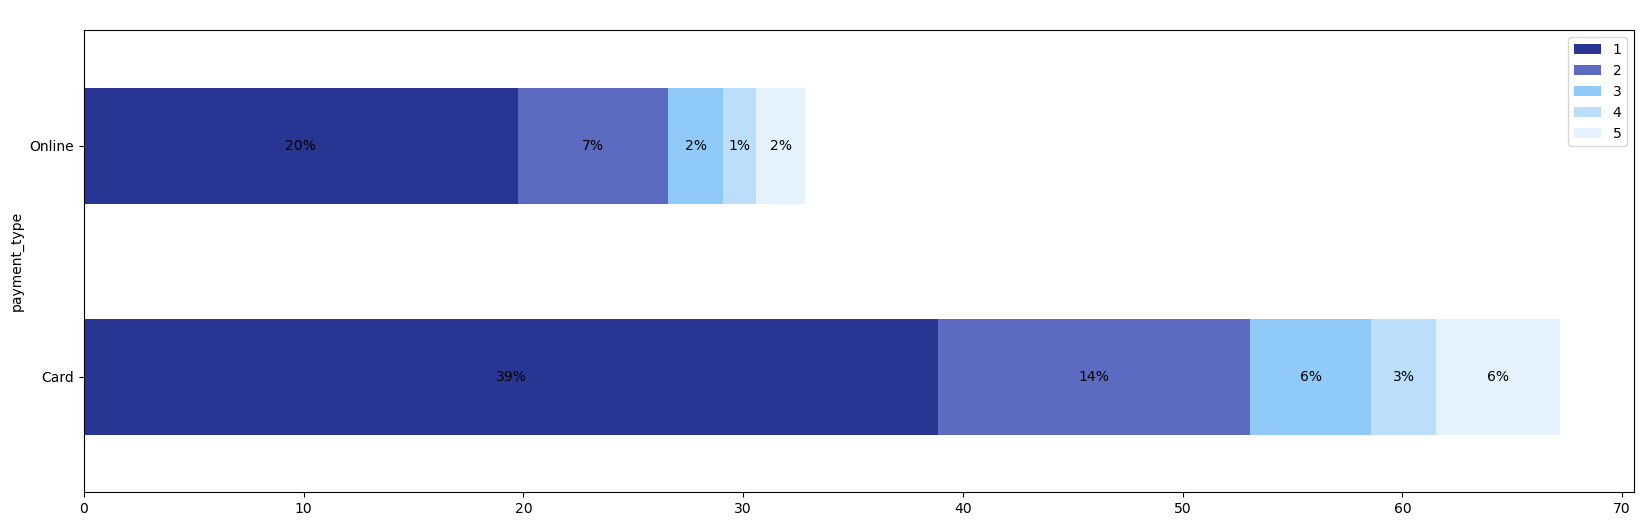

In [38]:
# Calculating total passenger count distribution based on different payment type
passenger_count = nyc_taxitrips_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# Renaming the passenger_count to count to reset the index
passenger_count.rename(columns= {'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# Calculating the percentage of each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# Creating a new empty dataframe to store the distribution of each payment type
df = pd.DataFrame(columns= ['payment_type', 1,2,3,4,5])
df['payment_type'] = ['Card','Online']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind='barh', stacked=True, title= ' ', ax=ax, color = ['#283593', '#5C6BC0','#90CAF9', '#BBDEFB', '#E3F2FD'])

# Add percentage text on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.savefig('stacked_bar_dist_taxi.png')

### Hypothesis Testing

In order to select a statistical test for our scenario, initial step is to validate if the fare amounts distribution follows normal distribution.
While the histogram depicted above suggests otherwise, we will confirm using QQ plot

Quantile-Quantile(QQ) plots can be used to access whether the fare amount distributions for each payment type are approximately normally distributed.
If the data points closely align with the daigonal line in the plot, it suggest it follows a normal distribution

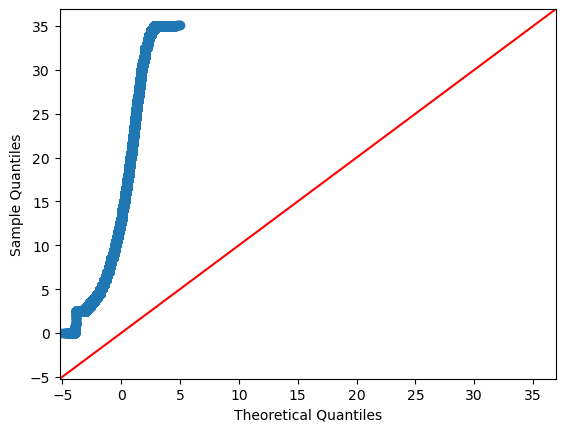

In [35]:
# Create Q-Q plot with 45 degree line added to plot
fig = sm.qqplot(nyc_taxitrips_data['fare_amount'], line='45')
plt.show()

The data points clearly do not follow the 45 degree line, which means they do not follow distribution. So we Z Test will not be good for this distribution, so that's why we will use T-Test.

Given that T test can be applicable to small and large samples and does not require the population standard deviation, it is more universally applicable approach for hypothesis testing in many practical scenarios, including analysis of taxi trip data.
In the analysis of NYC Taxi Trip data, while we're likely dealing large datasets with unknown population standard deviation, the T-test offers a more flexible methode for comparing means between two different groups.

Null Hypothesis:: There is no difference in average fare between customers who pay using Card and customers who pay Online.

Alternate Hypothesis:: There is a difference in average fare between customers who pay using Card and customers who pay Online.

In [36]:
# Card sample
card_method = nyc_taxitrips_data[nyc_taxitrips_data['payment_type'] == 'Card']['fare_amount']

# Online sample
online = nyc_taxitrips_data[nyc_taxitrips_data['payment_type'] == 'Online']['fare_amount']

# Performing T-test on both the samples
t_stat, p_value = stats.ttest_ind(a=card_method, b=online, equal_var=False)
print(f"T-statistics: {t_stat}, P-value: {p_value}")

# Comparing p-value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistics: 222.36978034159912, P-value: 0.0

Reject the null hypothesis


Since the p-value is significantly smaller than 5 percent, we reject the null hypothesis.

We can conclude that there is statistically significant difference in average fare between customers who pay using Card and customers who pay Online.

The key business suggestion to stakeholders is 'To encourage customers to pay using Card method that help generate more revenue for the cab drivers.